<a href="https://www.kaggle.com/code/adityaramachandran27/eda-on-marine-micro-plastic?scriptVersionId=131444911" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marine-microplastic-on-world-density-noaa/MICROPLASTIC_DATA_BASED_ON_LAT_LONG/GEOMARINE_MICRO.csv
/kaggle/input/marine-microplastic-on-world-density-noaa/MICROPLASTIC_DATA_BASED_ON_LAT_LONG/ADVENTURE_MICRO_FROM_SCIENTIST.csv
/kaggle/input/marine-microplastic-on-world-density-noaa/MICROPLASTIC_DATA_BASED_ON_LAT_LONG/SEA_MICRO.csv


In [2]:
df = pd.read_csv('/kaggle/input/marine-microplastic-on-world-density-noaa/MICROPLASTIC_DATA_BASED_ON_LAT_LONG/ADVENTURE_MICRO_FROM_SCIENTIST.csv')
df.head()

,Date,Latitude,Longitude,Total_Pieces_L,Normalized
0,1970-01-01,63.221610,-41.405960,3,0.009288
1,1970-01-01,63.470810,-41.934710,0,0.000000
2,1970-01-01,65.610920,-37.645740,1,0.003096
3,1970-01-01,9.958530,-84.891080,9,0.027864
4,2013-07-01,59.378683,-153.520867,1,0.003096


In [3]:
df.shape

(1393, 5)

In [4]:
df.size

6965

In [5]:
df.isnull().sum()

Date              0
Latitude          0
Longitude         0
Total_Pieces_L    0
Normalized        0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1392
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1392 non-null   object 
 1   Latitude        1392 non-null   float64
 2   Longitude       1392 non-null   float64
 3   Total_Pieces_L  1392 non-null   int64  
 4   Normalized      1392 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 65.2+ KB


In [10]:
df.describe()

,Latitude,Longitude,Total_Pieces_L,Normalized
count,1392.000000,1392.000000,1392.000000,1392.000000
mean,17.359328,-50.701837,12.759339,0.039503
std,26.977673,66.269239,27.327662,0.084606
min,-65.177500,-169.926130,0.000000,0.000000
25%,14.292092,-83.202638,1.000000,0.003096
50%,18.710717,-56.427642,4.500000,0.013932
75%,29.482750,-28.019375,12.000000,0.037152
max,81.090000,174.135000,323.000000,1.000000


In [11]:
# making cols for month and year

df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1392
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1392 non-null   datetime64[ns]
 1   Latitude        1392 non-null   float64       
 2   Longitude       1392 non-null   float64       
 3   Total_Pieces_L  1392 non-null   int64         
 4   Normalized      1392 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 65.2 KB


In [12]:
df['month'] = df['Date'].dt.month_name()

In [13]:
df['year'] = df['Date'].dt.year

In [14]:
df.head()

,Date,Latitude,Longitude,Total_Pieces_L,Normalized,month,year
0,1970-01-01,63.221610,-41.405960,3,0.009288,January,1970
1,1970-01-01,63.470810,-41.934710,0,0.000000,January,1970
2,1970-01-01,65.610920,-37.645740,1,0.003096,January,1970
3,1970-01-01,9.958530,-84.891080,9,0.027864,January,1970
4,2013-07-01,59.378683,-153.520867,1,0.003096,July,2013


In [15]:
df.year.unique()

array([1970, 2013, 2014, 2015, 2016, 2017])

In [16]:
df.year.value_counts()

2014    725
2015    318
2016    244
2017     51
2013     50
1970      4
Name: year, dtype: int64

In [17]:
df.month.unique()

array(['January', 'July', 'September', 'October', 'November', 'December',
       'February', 'March', 'April', 'May', 'June', 'August'],
      dtype=object)

In [18]:
df.month.value_counts()

December     328
November     315
March        115
September    104
January       87
May           80
June          79
February      67
October       63
July          59
April         55
August        40
Name: month, dtype: int64

In [19]:
df.head()

,Date,Latitude,Longitude,Total_Pieces_L,Normalized,month,year
0,1970-01-01,63.221610,-41.405960,3,0.009288,January,1970
1,1970-01-01,63.470810,-41.934710,0,0.000000,January,1970
2,1970-01-01,65.610920,-37.645740,1,0.003096,January,1970
3,1970-01-01,9.958530,-84.891080,9,0.027864,January,1970
4,2013-07-01,59.378683,-153.520867,1,0.003096,July,2013


In [20]:
import plotly.express as px
fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', z='Total_Pieces_L', radius=10,
                         zoom=1,
                        mapbox_style="stamen-terrain", animation_frame='year', animation_group='Total_Pieces_L',
                       height=700, width = 1500)
fig.show()

In [21]:
# Bubble map 

fig = px.scatter_mapbox(df,lat='Latitude', lon='Longitude', size='Total_Pieces_L',
                         zoom=1, size_max=15, color_continuous_scale=px.colors.cyclical.IceFire, mapbox_style="carto-positron",
                       height=700, width = 1500)
fig.show()


In [22]:
fig = px.scatter_mapbox(df,lat='Latitude', lon='Longitude', size='Total_Pieces_L',
                         zoom=0, size_max=15, mapbox_style="carto-positron",
                       animation_frame='year',animation_group='Total_Pieces_L')
fig.show()


In [23]:
df.head()

,Date,Latitude,Longitude,Total_Pieces_L,Normalized,month,year
0,1970-01-01,63.221610,-41.405960,3,0.009288,January,1970
1,1970-01-01,63.470810,-41.934710,0,0.000000,January,1970
2,1970-01-01,65.610920,-37.645740,1,0.003096,January,1970
3,1970-01-01,9.958530,-84.891080,9,0.027864,January,1970
4,2013-07-01,59.378683,-153.520867,1,0.003096,July,2013


In [24]:
yoy = df.groupby('year')['Total_Pieces_L'].sum()

In [25]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Year vs Total Pieces')

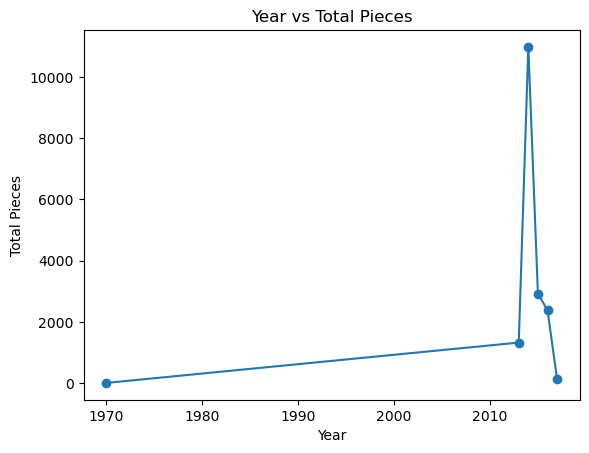

In [26]:
plt.plot(yoy.index, yoy.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Pieces')
plt.title('Year vs Total Pieces')

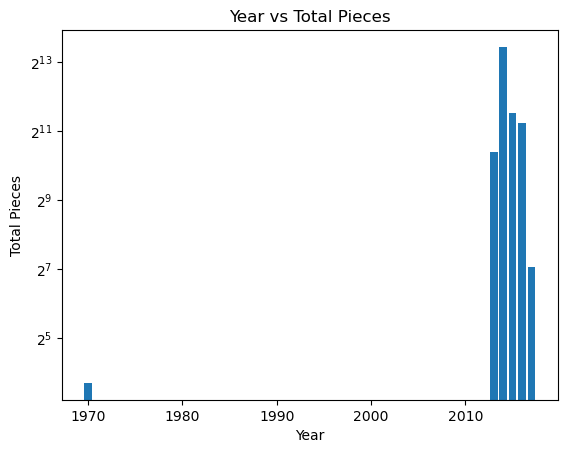

In [27]:
plt.bar(yoy.index, yoy.values)
plt.xlabel('Year')
plt.ylabel('Total Pieces')
plt.title('Year vs Total Pieces')
plt.yscale('log',base=2) 